In [22]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score 

# Load dataset
first_df = pd.read_csv("first.csv")
X = first_df[['x', 'y']]
Y = first_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)

# Dummy Model
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

def model_evaluation(y_test, y_pred):
    print('Trained Model Test Data Accuracy Score :', accuracy_score(y_test, y_pred)*100)
    testacc = accuracy_score(y_test, y_pred)
    testrecall = recall_score(y_test, y_pred)
    testprecision = precision_score(y_test, y_pred)
    print("\n", classification_report(y_test, y_pred))
    return testacc, testrecall, testprecision

testacc, testrecall, testprecision = model_evaluation(y_test, y_pred)

result_scores = {}
result_scores['Dummy'] = (
    accuracy_score(y_train, dummy_clf.predict(X_train)),
    testacc,
    testprecision,
    testrecall
)


Trained Model Test Data Accuracy Score : 51.0

               precision    recall  f1-score   support

       False       0.00      0.00      0.00       196
        True       0.51      1.00      0.68       204

    accuracy                           0.51       400
   macro avg       0.26      0.50      0.34       400
weighted avg       0.26      0.51      0.34       400



C:\Users\crazy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\crazy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\crazy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [23]:
# KNN Training (KNN-1)
from sklearn.neighbors import KNeighborsClassifier

# Fit KNN model on first.csv dataset
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluating
testacc, testrecall, testprecision = model_evaluation(y_test, y_pred)

# Storing scores
result_scores['KNN-1'] = (
    accuracy_score(y_train, knn.predict(X_train)),
    testacc,
    testprecision,
    testrecall
)


Trained Model Test Data Accuracy Score : 86.75

               precision    recall  f1-score   support

       False       0.87      0.86      0.86       196
        True       0.87      0.87      0.87       204

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [24]:
# Load second dataset
second_df = pd.read_csv("second.csv")
X2 = second_df[['x', 'y']]
Y2 = second_df['result']
y_pred = knn.predict(X2)
testacc, testrecall, testprecision = model_evaluation(Y2, y_pred)
result_scores['KNN-2'] = (
    accuracy_score(y_train, knn.predict(X_train)),  # still trained on first.csv
    testacc,
    testprecision,
    testrecall
)


Trained Model Test Data Accuracy Score : 90.2

               precision    recall  f1-score   support

       False       0.91      0.89      0.90       503
        True       0.89      0.92      0.90       497

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [25]:
# Load third dataset
third_df = pd.read_csv("third.csv")
X3 = third_df[['x', 'y']]
Y3 = third_df['result']
knn_retrain = KNeighborsClassifier(n_neighbors=15)
knn_retrain.fit(X3, Y3)
y_pred = knn_retrain.predict(X3)
testacc, testrecall, testprecision = model_evaluation(Y3, y_pred)
result_scores['KNN-3-1'] = (
    accuracy_score(Y3, knn_retrain.predict(X3)),
    testacc,
    testprecision,
    testrecall
)


Trained Model Test Data Accuracy Score : 96.5

               precision    recall  f1-score   support

       False       0.98      0.98      0.98       801
        True       0.92      0.90      0.91       199

    accuracy                           0.96      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



In [26]:
# Load fourth dataset
fourth_df = pd.read_csv("fourth.csv")
X4 = fourth_df[['x', 'y']]
Y4 = fourth_df['result']
y_pred = knn_retrain.predict(X4)
testacc, testrecall, testprecision = model_evaluation(Y4, y_pred)
result_scores['KNN-3-2'] = (
    accuracy_score(Y4, knn_retrain.predict(X4)),
    testacc,
    testprecision,
    testrecall
)


Trained Model Test Data Accuracy Score : 95.7

               precision    recall  f1-score   support

       False       0.97      0.98      0.97       755
        True       0.92      0.90      0.91       245

    accuracy                           0.96      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



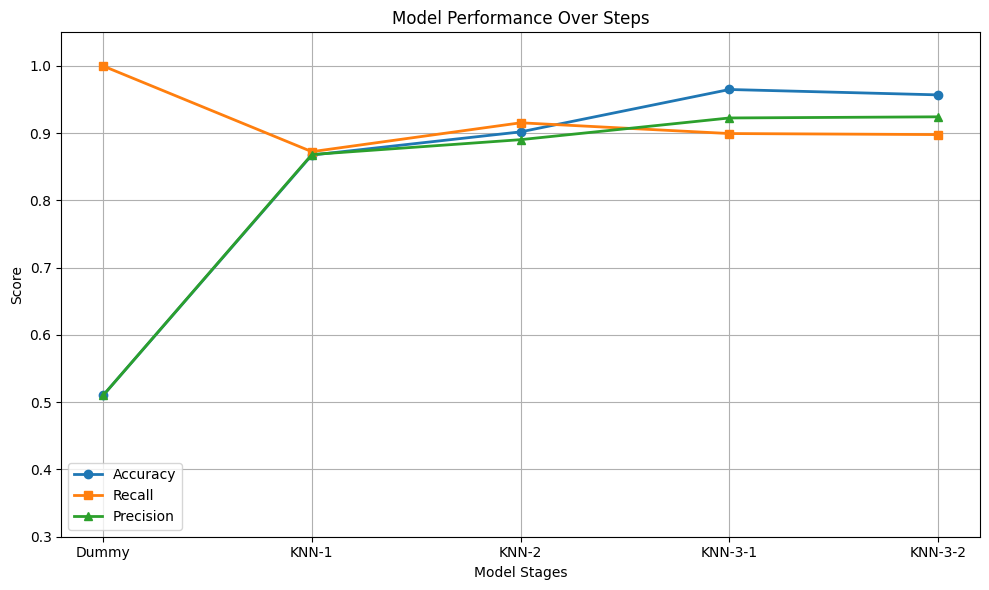

In [27]:
# Graphing model performance
steps = list(result_scores.keys())
accuracies = [result_scores[s][1] for s in steps]
recalls = [result_scores[s][3] for s in steps]
precisions = [result_scores[s][2] for s in steps]

plt.figure(figsize=(10, 6))
plt.plot(steps, accuracies, marker='o', label='Accuracy', linewidth=2)
plt.plot(steps, recalls, marker='s', label='Recall', linewidth=2)
plt.plot(steps, precisions, marker='^', label='Precision', linewidth=2)

plt.title('Model Performance Over Steps')
plt.xlabel('Model Stages')
plt.ylabel('Score')
plt.ylim(0.3, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
